## 소방청 - 서울소재 소방기관

In [31]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [32]:
url = 'https://www.nfa.go.kr/nfa/introduce/status/firestationidfo/?searchDistance=10&searchMode=distance&myX=37.5129582&myY=126.9193489&searchKeyword='
driver = webdriver.Chrome()
driver.get(url)

In [33]:
# 검색 입력창에 서울 입력하기
driver.find_element(By.ID, 'searchKeyword').send_keys('서울')


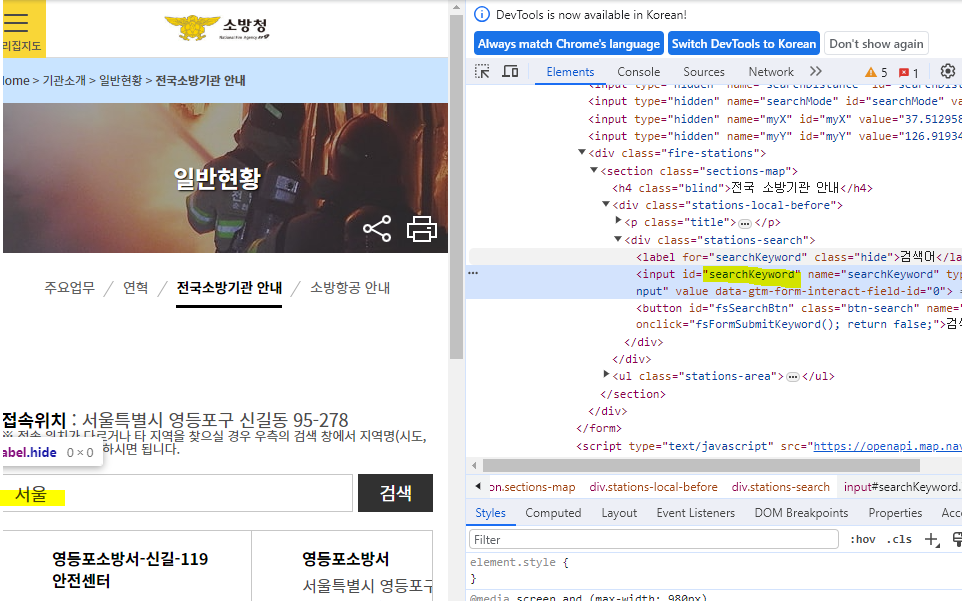

In [34]:
# 검색 버튼 클릭
driver.find_element(By.ID, 'fsSearchBtn').click()

![Alt text](image-9.png)

In [35]:
# 페이지 이동해서 HTML 코드를 BeautifulSoup으로 parsing
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.stations-list > li')
len(lis)

10

- 태그: 태그명
- 클래스: .
- id: #
- 자식: td th
- 자손: tr > td

In [36]:
# 기관명, 주소, 전화번호
li = lis[0]
title = li.select_one('.title').get_text().strip()
address = li.select_one('address').get_text().strip()   # select_one 대신 find로 해도됨
tel = li.select_one('.tel').get_text().strip()
title, address, tel

('동작소방서', '서울특별시 동작구 여의대방로16길 55(신대방동)', '02-847-1190')

In [37]:
data = []
for li in lis:
    title = li.select_one('.title').get_text().strip()
    address = li.select_one('address').get_text().strip()   # select_one 대신 find로 해도됨
    tel = li.select_one('.tel').get_text().strip()
    data.append({'기관명':title, '주소':address, '전화번호':tel})

In [38]:
pd.DataFrame(data)

,기관명,주소,전화번호
0,동작소방서,서울특별시 동작구 여의대방로16길 55(신대방동),02-847-1190
1,서대문소방서,서울특별시 서대문구 연희로 182(연희동),02-3144-1190
2,광진소방서,서울특별시 광진구 광나루로 480(구의동),02-457-0119
3,송파소방서,서울특별시 송파구 오금로51길 56(마천동),02-403-2119
4,양천소방서,서울특별시 양천구 목동서로 180(목동),02-2655-1119
5,은평소방서,서울특별시 은평구 통일로 962(진관동),02-355-0119
6,노원소방서,서울특별시 노원구 한글비석로 1길 8(하계동),02-977-0119
7,종로소방서,서울특별시 종로구 종로1길 28(수송동),02-735-6119
8,도봉소방서,서울특별시 도봉구 도봉로 666(방학동),02-3492-3437
9,용산소방서,서울특별시 용산구 한강대로 167(한강로2가),02-794-0119


- 두번째 페이지 이동

- 찾아가는 방법 1
![Alt text](image-10.png)
#listForm > div > section > ul > li:nth-child(1) > div > div > ul > li:nth-child(4) > a


- 찾아가는 방법 2 
    - Xpath 복사 <br>
//*[@id="listForm"]/div/section/ul/li[1]/div/div/ul/li[4]/a

In [39]:
# //*[@id="listForm"]/div/section/ul/li[1]/div/div/ul/li[4]/a
driver.find_element(By.XPATH, '//*[@id="listForm"]/div/section/ul/li[1]/div/div/ul/li[4]/a').click()

- next(>) 페이지로 이동

In [40]:
# driver.find_element(By.CLASS_NAME, 'next_page').click()      이렇게도 가능
driver.find_element(By.CSS_SELECTOR, '.next_page').click()        

- 모든 페이지에 대해서 적용

In [41]:
# 첫번째 페이지 
driver.get(url)
time.sleep(1)           # selenium으로 반복문안에 들어갈땐 항상 쉬는 텀을 주기!
driver.find_element(By.ID, 'searchKeyword').send_keys('서울')
driver.find_element(By.ID, 'fsSearchBtn').click()


In [42]:
# 검색결과 건수 확인
count = driver.find_element(By.XPATH, '//*[@id="listForm"]/div/section/div/p/strong[2]').text
count = int(count[:-1])
count

100

In [43]:
import math
total_pages = math.ceil(count/10)
total_pages

10

In [44]:
# i = 0   => 1페이지
# i = 홀수 => 2페이지  넥스트버튼 눌러야함
# i = 짝수 => 3페이지  두번째 페이지(4페이지) 눌러야함

data = []
for i in range(total_pages):
    if i % 2 == 1 : 
        driver.find_element(By.CSS_SELECTOR, '.next_page').click()    
        time.sleep(1)
    if i > 0 and i % 2 == 0:
        driver.find_element(By.XPATH, '//*[@id="listForm"]/div/section/ul/li[1]/div/div/ul/li[4]/a').click()
        time.sleep(1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    lis = soup.select('.stations-list > li')

    for li in lis:
        title = li.select_one('.title').get_text().strip()
        address = li.select_one('address').get_text().strip()   # select_one 대신 find로 해도됨
        tel = li.select_one('.tel').get_text().strip()
        data.append({'기관명':title, '주소':address, '전화번호':tel})

driver.close

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="0491082717161ef5f935264f4836e300")>>

In [45]:
len(data)

100

In [46]:
df = pd.DataFrame(data)
df

,기관명,주소,전화번호
0,동작소방서,서울특별시 동작구 여의대방로16길 55(신대방동),02-847-1190
1,서대문소방서,서울특별시 서대문구 연희로 182(연희동),02-3144-1190
2,광진소방서,서울특별시 광진구 광나루로 480(구의동),02-457-0119
3,송파소방서,서울특별시 송파구 오금로51길 56(마천동),02-403-2119
4,양천소방서,서울특별시 양천구 목동서로 180(목동),02-2655-1119
...,...,...,...
95,송파소방서-운동장-119 안전센터,서울특별시 송파구 올림픽로 25 (잠실동),02-2203-2380
96,송파소방서-잠실-119 안전센터,서울특별시 송파구 석촌호수로 151 (잠실동),02-422-0119
97,송파소방서-방이-119 안전센터,서울특별시 송파구 강동대로 286 (방이동),02-409-0059
98,송파소방서-거여-119 안전센터,서울특별시 송파구 마천로 329 (마천동),02-400-0119
